In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('D:/jupyternotebook/FDD_sensor_impact_framework_applied_to_FRP/results/module_3/module_3_summarized_results_combined.csv')

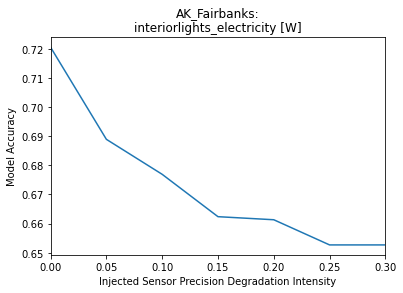

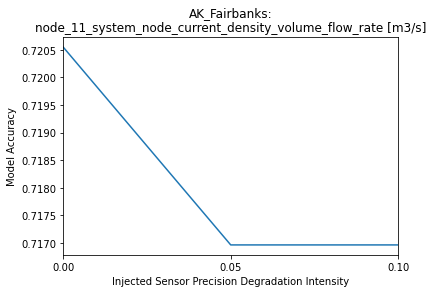

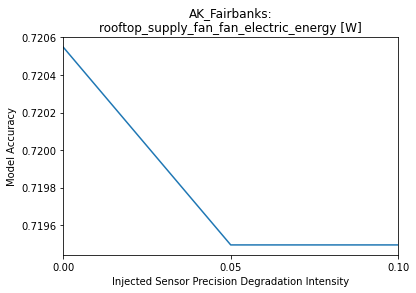

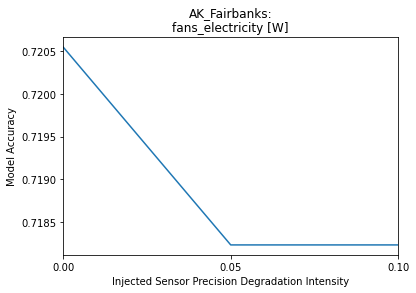

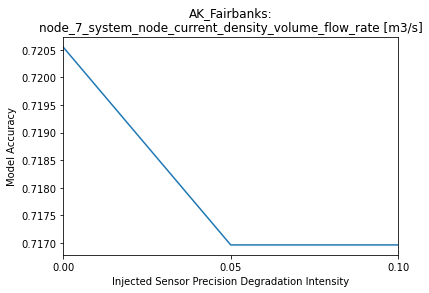

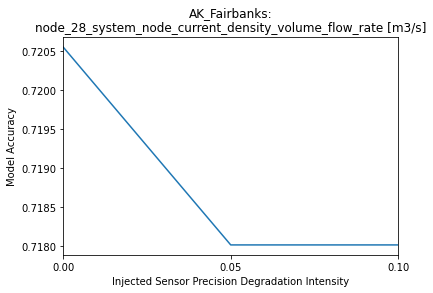

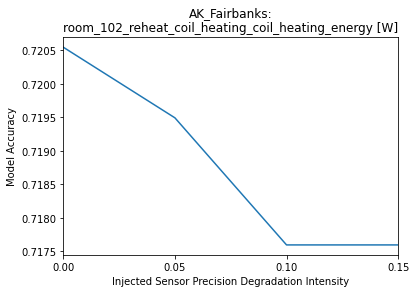

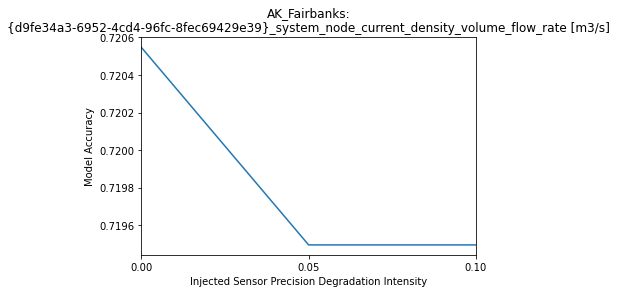

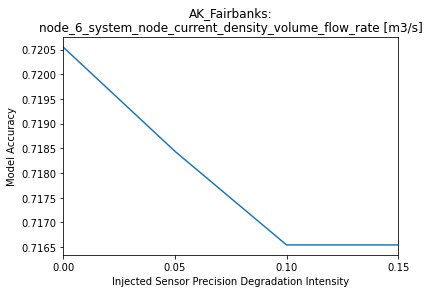

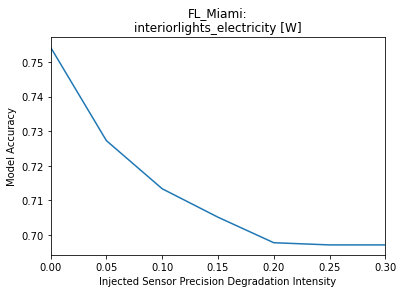

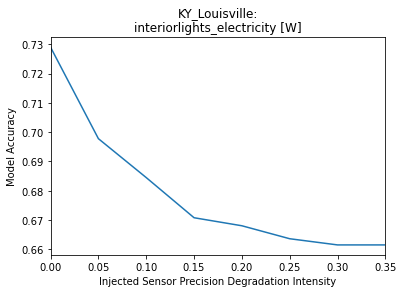

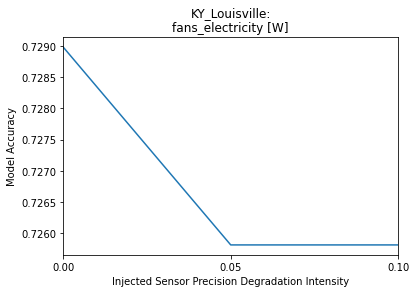

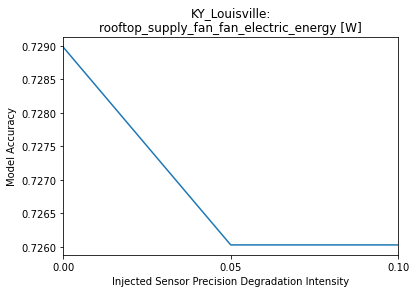

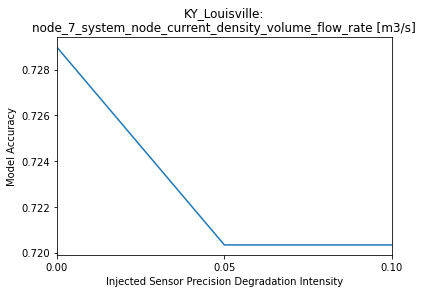

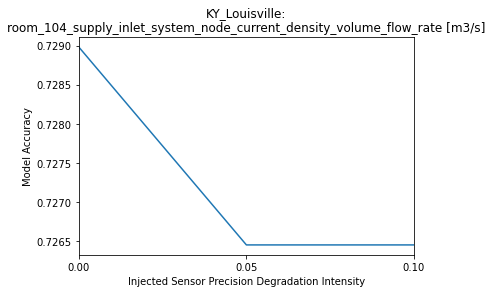

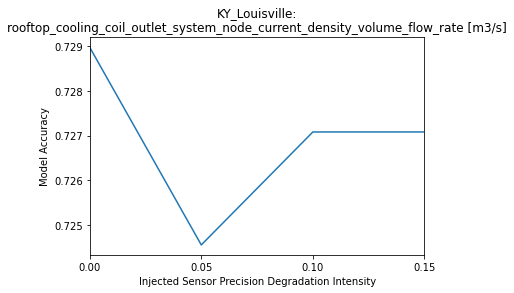

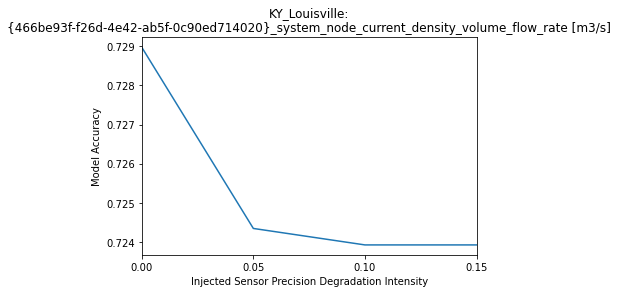

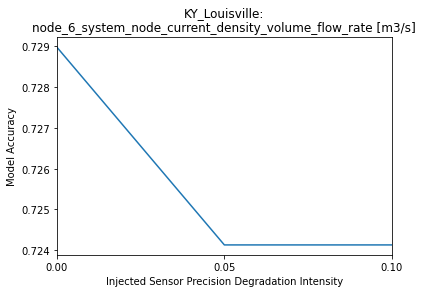

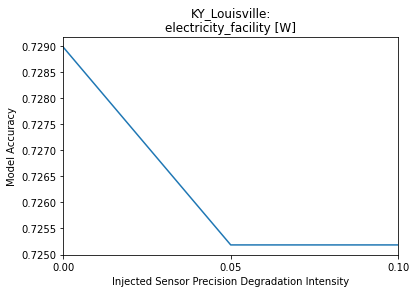

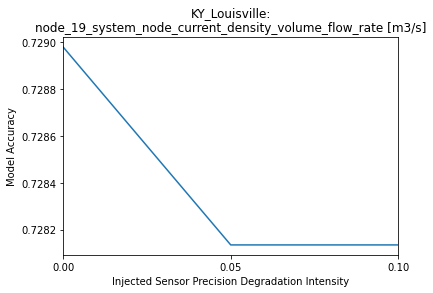

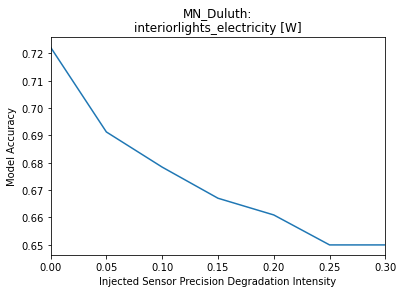

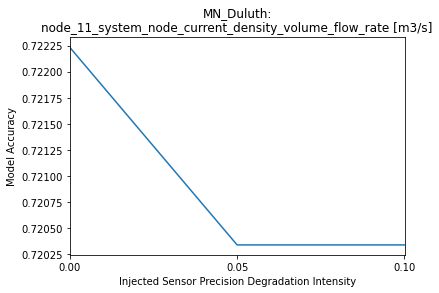

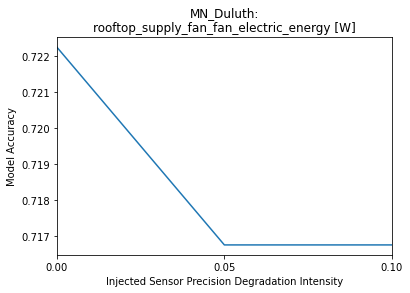

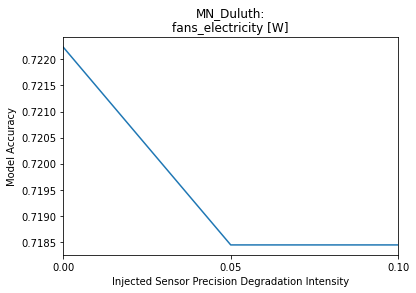

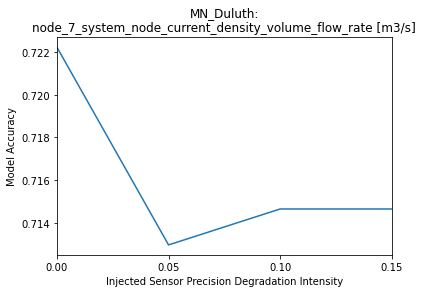

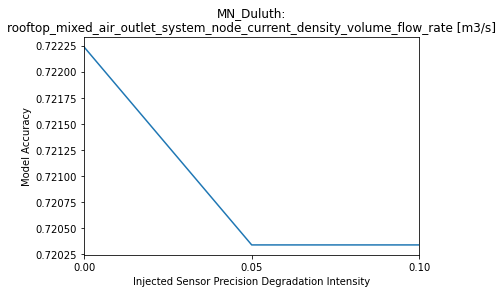

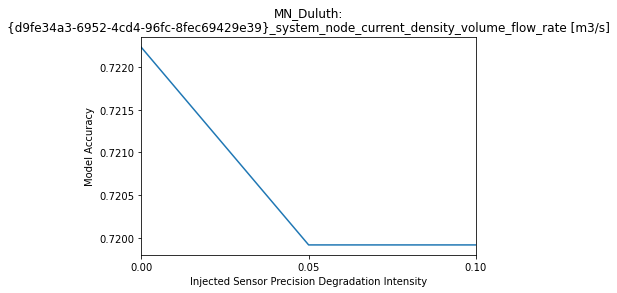

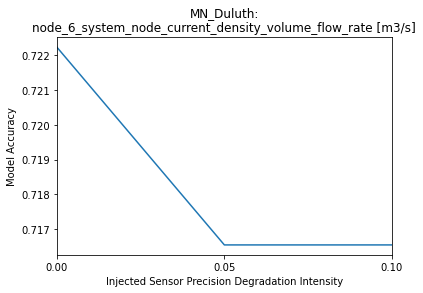

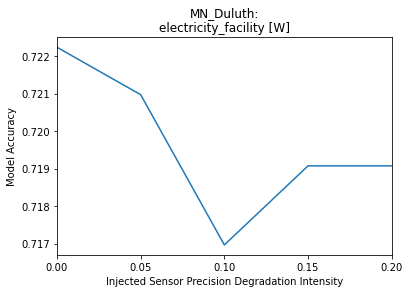

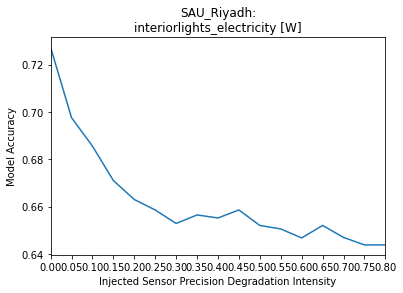

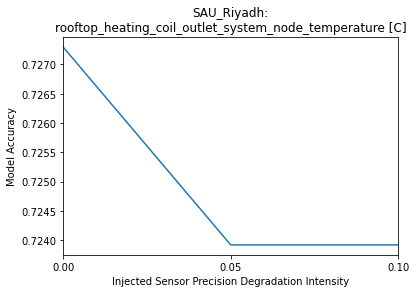

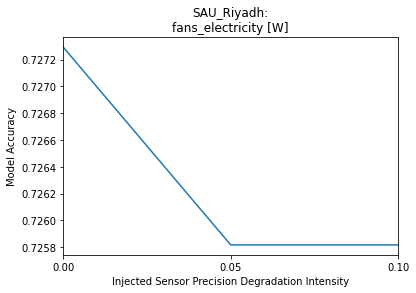

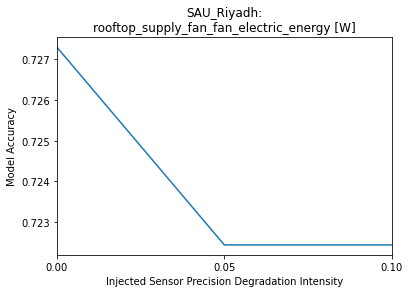

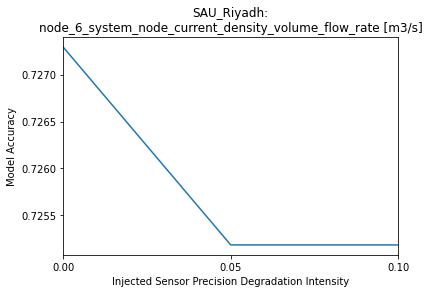

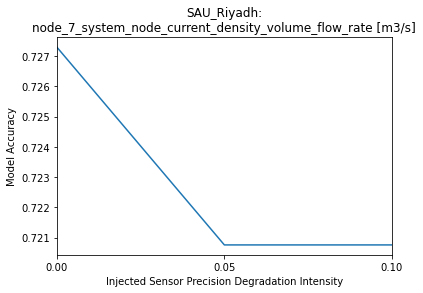

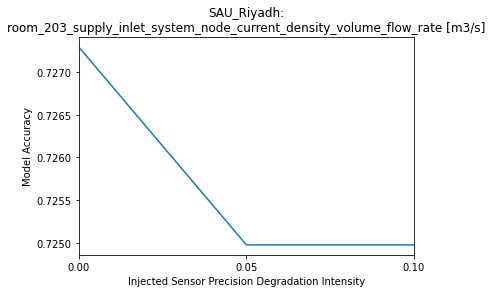

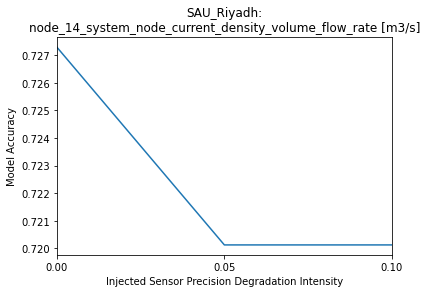

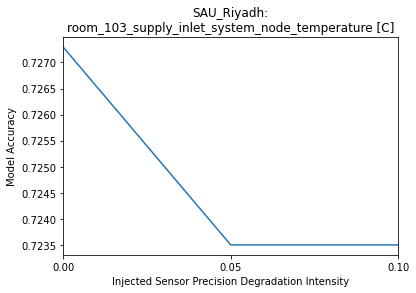

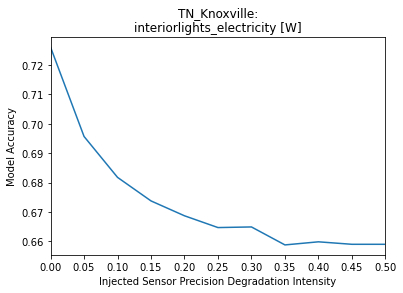

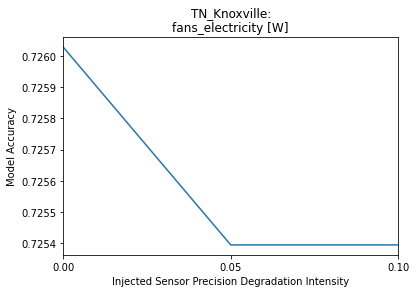

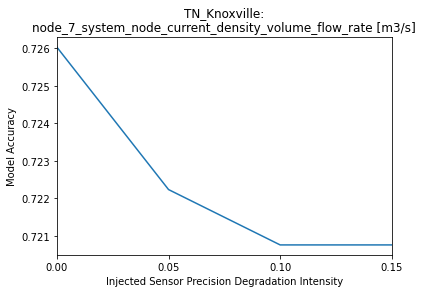

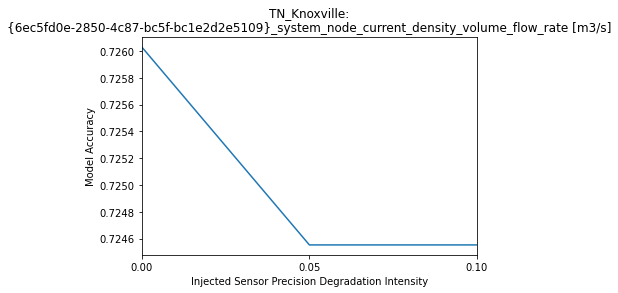

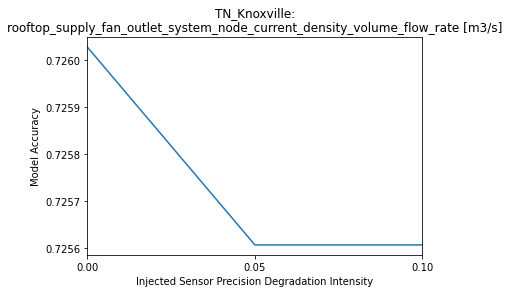

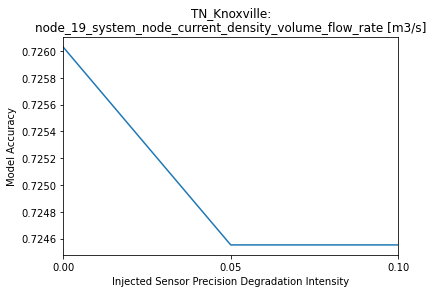

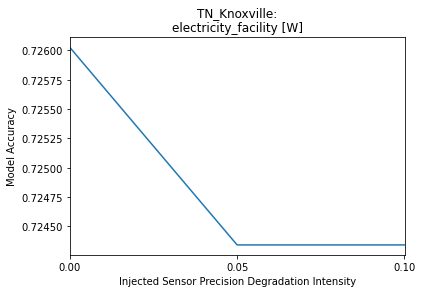

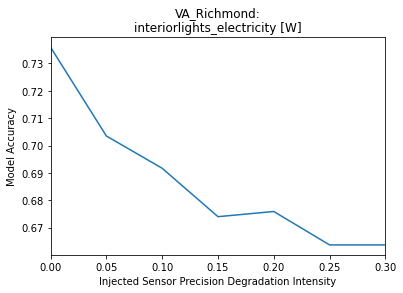

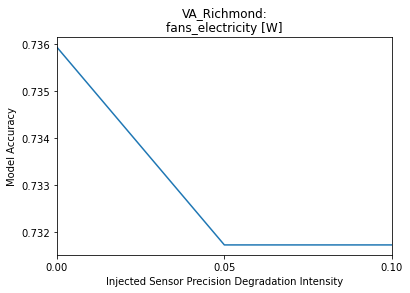

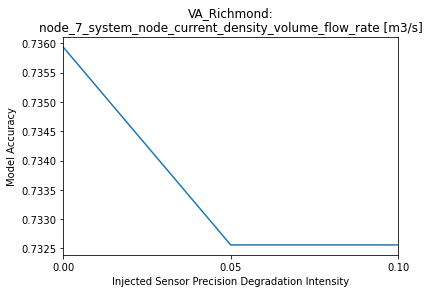

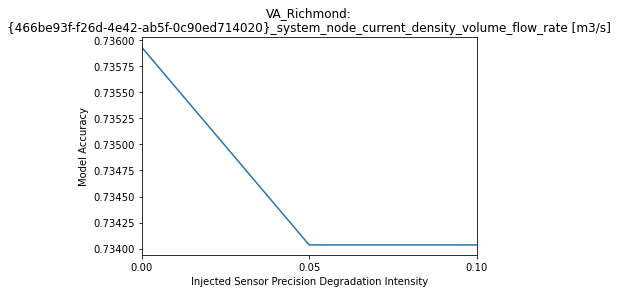

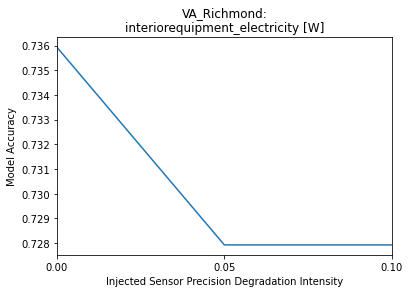

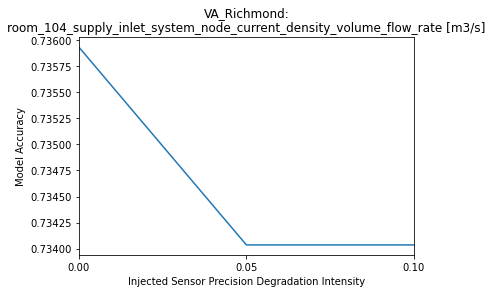

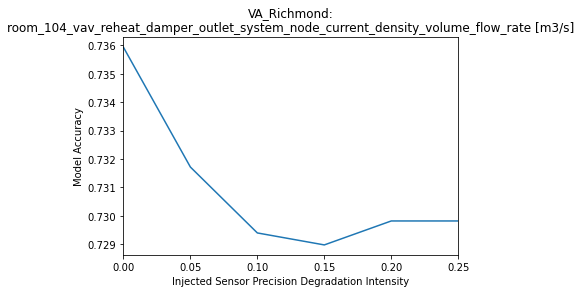

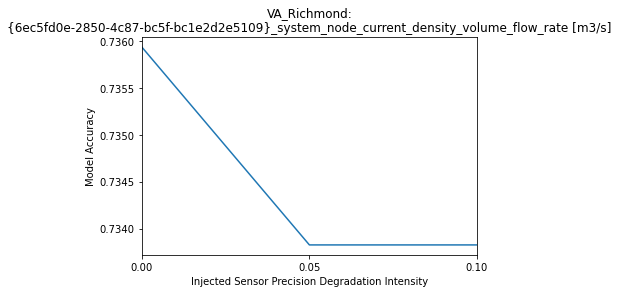

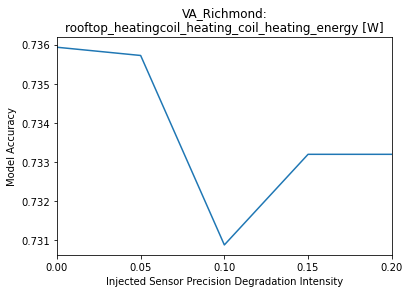

In [18]:
temp_sensor_set = pd.read_csv('Suggested Sensor Sets.csv')
temp_sensor_set = temp_sensor_set[['E+ Output Field', 'Sensor Set']]
temp_sensor_set = temp_sensor_set.iloc[1:185]
sensor_group_dict = temp_sensor_set.set_index('E+ Output Field').to_dict()['Sensor Set']



for weather in df_raw.weather.unique():
    df_processed = df_raw.loc[df_raw.weather == weather][['weather','sensor','threshold','FDD_performance_list']]
    FDD_performance_change_list = []
    for x in df_processed['FDD_performance_list']:
        FDD_performance_change_list.append(-abs(((1-float(x[1:-1].split(',')[-1])) - (1 - float(x[1:-1].split(',')[0])))/((1 - float(x[1:-1].split(',')[0]))) * 100))    
    df_processed['FDD_performance_percentage_change'] = FDD_performance_change_list
    
    df_processed_in_table = df_processed[['weather','sensor','threshold','FDD_performance_percentage_change']]
    
    df_processed_in_table['sensor_group'] = df_processed_in_table['sensor'].map(sensor_group_dict)
    
    df_processed_in_table = df_processed_in_table[['weather','sensor','sensor_group','threshold','FDD_performance_percentage_change']]
    
    df_processed_in_table = df_processed_in_table.replace('Unlikely','Advanced')
    
    df_processed_in_table = df_processed_in_table.round(2)
    
    x_axis_list = [x_axis_string * 0.05 for x_axis_string  in range(20)]
    
    df_processed_in_table.to_csv(f'D:/jupyternotebook/FDD_sensor_impact_framework_applied_to_FRP/results/module_3/determinstic_results_{weather}.csv', index = None)
    
    for x,sensor in zip(df_processed['FDD_performance_list'],df_processed['sensor']):
        float_list = []
        for y in x[1:-1].split(','):
            float_list.append(1-float(y))
        float_list.append(float_list[-1])
        if len(float_list) > 1 and float_list[-1]<float_list[0]:
            plt.plot(x_axis_list[0:len(float_list)], float_list)
            plt.title(f'{weather}:\n{sensor}')
            plt.xticks(np.arange(x_axis_list[0], x_axis_list[len(float_list)], 0.05))
            plt.xlim(0,x_axis_list[len(float_list)]-0.05)
            plt.ylabel('Model Accuracy')
            plt.xlabel('Injected Sensor Precision Degradation Intensity')
            plt.show()    